In [26]:
import pandas as pd

goals = pd.read_csv("fbref/EPLGoal1920.csv",header=[0,1])
print(goals)
new_cols = []
for col in goals.columns:
    new_cols.append(col[1])
goals.columns = new_cols

    Unnamed: 0_level_0                         Unnamed: 1_level_0  \
                    Rk                                     Player   
0                    1    Patrick van Aanholt\Patrick-van-Aanholt   
1                    2                      Max Aarons\Max-Aarons   
2                    3                Tammy Abraham\Tammy-Abraham   
3                    4                        Che Adams\Che-Adams   
4                    5                              Adrián\Adrian   
..                 ...                                        ...   
507                508                Wilfried Zaha\Wilfried-Zaha   
508                509  Christoph Zimmermann\Christoph-Zimmermann   
509                510    Oleksandr Zinchenko\Oleksandr-Zinchenko   
510                511        Richairo Živković\Richairo-Zivkovic   
511                512                      Kurt Zouma\Kurt-Zouma   

    Unnamed: 2_level_0 Unnamed: 3_level_0 Unnamed: 4_level_0  \
                Nation                

In [27]:
print(new_cols)

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'PK', 'PKatt', 'Sh', 'SoT', 'FK', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches']


In [58]:
goals["npxGcon"] = (goals["np:G-xG"]+goals["npxG"]) / goals["npxG"]
new_goals = goals.dropna()[(goals["Gls"]>=1) & (goals["npxG"]>0) & (goals["Sh"]>=0)]
print(new_goals.sort_values(by=["Gls"],ascending=False)[["Player","npxG/Sh","npxGcon"]])

                                                Player  npxG/Sh   npxGcon
471                            Jamie Vardy\Jamie-Vardy     0.20  1.363636
25   Pierre-Emerick Aubameyang\Pierre-Emerick-Aubam...     0.17  1.386861
401                        Mohamed Salah\Mohamed-Salah     0.12  1.029412
204                              Danny Ings\Danny-Ings     0.17  1.428571
275                              Sadio Mané\Sadio-Mane     0.20  1.311475
..                                                 ...      ...       ...
324                          Glenn Murray\Glenn-Murray     0.15  0.476190
323                        João Moutinho\Joao-Moutinho     0.04  1.250000
118                            Josip Drmić\Josip-Drmic     0.25  0.357143
121                            Shane Duffy\Shane-Duffy     0.27  0.625000
355                    Andreas Pereira\Andreas-Pereira     0.06  0.434783

[250 rows x 3 columns]


C:\Users\ducnm\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


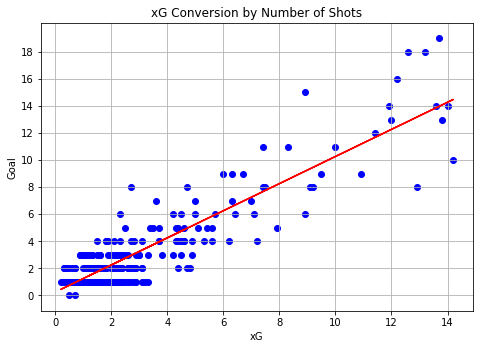

In [85]:
import matplotlib.pyplot as plt
import numpy as np


npxGpSh = new_goals["npxG/Sh"].values
npxGcon = new_goals["npxGcon"].values
numSh = new_goals["Sh"].values
npxG = new_goals["npxG"]
npG = (new_goals["np:G-xG"]+new_goals["npxG"]).values
# print(npxGpSh.max())
# print(npxGcon.max())

fig=plt.figure()
fig.set_facecolor("white")
ax=fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0,20,2))
ax.scatter(npxG, npG, color='b')
ax.set_xlabel('xG')
ax.set_ylabel('Goal')
ax.set_title('xG Conversion by Number of Shots')
plt.grid(True)
z = np.polyfit(npxG, npG, 1)
p = np.poly1d(z)
plt.plot(npxG,p(npxG),"r-")
plt.show()